In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import copy
import matplotlib.pyplot as plt
import glob
from pathlib import Path
import os
import plotly.express as px

In [2]:
# work_dir=Path("/scratch/fransjevanoors/global_sr")
work_dir=Path("/mnt/u/LSM root zone/global_sr")

In [3]:
f = f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv'
df = pd.read_csv(f,index_col=0)

In [4]:
df

,p_mean,ep_mean,q_mean,t_mean,ai,hai,tdiff_max,tdiff_mean,idu_mean,idu_max,...,dv,pd,pop,nld,clt,lc,lit,st.1,lat,lon
de_0000778,4.045309,2.057641,0.842493,7.638991,1.965994,0.337366,24.641665,20.637500,2.86,16.13,...,0.0,22.02160,14377.860,0.241560,Snow,Forest,Unconsolidated sediments,NaN,47.723927,11.933343
br_0001850,4.186528,2.943133,1.030596,25.107997,1.422473,0.967762,6.181352,4.359281,7.14,72.03,...,0.0,27.11160,201182.800,0.491105,Equatorial,Agriculture,Acid plutonic rocks,NaN,-16.616687,-49.718967
ca_0003156,1.235331,1.331096,0.017540,3.742158,0.928056,1.003734,43.900205,36.056585,5.33,30.03,...,813.0,1.07419,46994.660,0.315056,Snow,Agriculture,Siliciclastic sedimentary rocks,NaN,49.506681,-103.275867
br_0001299,3.123837,2.907271,1.032392,24.338485,1.074491,1.257753,6.634216,5.093589,4.47,24.80,...,0.0,2.69709,12372.820,0.411808,Equatorial,No dominant class,Metamorphics,NaN,-17.108293,-39.967427
br_0001843,4.453621,2.944259,1.377108,24.223189,1.512646,0.877896,6.469796,4.538261,7.15,73.73,...,0.0,218.07500,2077434.000,0.342362,Equatorial,Agriculture,Metamorphics,NaN,-16.539263,-49.184522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ca_0001384,3.196726,1.852481,2.053996,2.880652,1.725645,0.341004,40.004254,33.168757,2.74,11.63,...,0.0,1.17995,12177.410,NaN,Snow,Forest,Metamorphics,NaN,47.253879,-72.245291
us_0001647,3.412146,2.749842,2.050785,18.061075,1.240852,0.855017,24.183295,20.816630,4.07,18.73,...,0.0,22.21370,2942.327,0.320770,Warm Temperate,Forest,Metamorphics,NaN,33.018864,-83.604070
gb_0000044,2.269773,1.157692,1.016338,9.472414,1.960603,0.677501,17.949959,13.999706,3.36,17.43,...,0.0,537.57700,312431.700,0.299489,Warm Temperate,Agriculture,Carbonate sedimentary rocks,NaN,53.261171,-1.396872
br_0000392,4.171185,3.215613,1.172224,25.953768,1.297166,1.004279,4.744549,3.214524,9.28,87.60,...,56782.0,4.07883,1688865.000,NaN,Equatorial,Shrubland,No dominant class,NaN,-12.531370,-47.860721


In [5]:
#Identify the columns that should be part of the PCA-Plots
columns = ['p_mean','ep_mean','t_mean','ai','idu_mean']
df_sel = df[columns].dropna() # select columns for PCA

x = StandardScaler().fit_transform(df_sel) #standardize the values in columns to mean=0
x = pd.DataFrame(x, columns=columns)

x

,p_mean,ep_mean,t_mean,ai,idu_mean
0,0.752903,-0.094068,-0.600713,0.566929,-0.647592
1,0.857766,1.132628,1.509826,-0.105590,0.731660
2,-1.333660,-1.100571,-1.071514,-0.717351,0.148378
3,0.068660,1.082946,1.416857,-0.536161,-0.128761
4,1.056098,1.134187,1.402927,0.005985,0.734883
...,...,...,...,...,...
8641,0.122784,-0.378281,-1.175598,0.269537,-0.686263
8642,0.282745,0.864856,0.658444,-0.330317,-0.257663
8643,-0.565530,-1.340792,-0.379206,0.560258,-0.486464
8644,0.846373,1.510101,1.612009,-0.260637,1.421286


In [9]:
#Performing the PCA using the PCA model function from sklearn ; https://medium.com/data-science-365/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0
pca_5 = PCA(n_components=5) #pca with 5 dimensions to see how well pca captures the variance of the data
pca_5.fit(x)
x_pca_5 = pca_5.transform(x)

In [10]:
print('variance explained by all 5 principal components=',sum(pca_5.explained_variance_ratio_ * 100)) # this should be 100% because we include all variables

variance explained by all 5 principal components= 100.00000000000003


In [11]:
a = pca_5.explained_variance_ratio_
print('the variance explained by variable:')
print(columns[0], a[0])
print(columns[1], a[1])
print(columns[2], a[2])
print(columns[3], a[3])
print(columns[4], a[4])

the variance explained by variable:
p_mean 0.4717537053601011
ep_mean 0.34171667190218763
t_mean 0.13694083668977078
ai 0.03608506231635757
idu_mean 0.01350372373158322


Text(0, 0.5, 'explained variance')

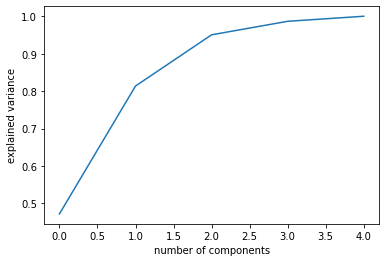

In [12]:
plt.plot(np.cumsum(pca_5.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance')

In [13]:
#Performing the PCA using the PCA model function from sklearn ; https://medium.com/data-science-365/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0
pca_2 = PCA(n_components=2) #pca with 2 dimensions to see how well pca captures the variance of the data
pca_2.fit(x)
x_pca_2 = pca_2.transform(x)

In [14]:
print('variance explained by 2 principal components=',sum(pca_2.explained_variance_ratio_ * 100)) # this should be 100% because we include all variables

variance explained by 2 principal components= 81.34703772622878


In [15]:
a = pca_2.explained_variance_ratio_
print('the variance explained by variable:')
print(columns[0], a[0])
print(columns[1], a[1])

the variance explained by variable:
p_mean 0.47175370536010053
ep_mean 0.34171667190218724


Text(0, 0.5, 'explained variance')

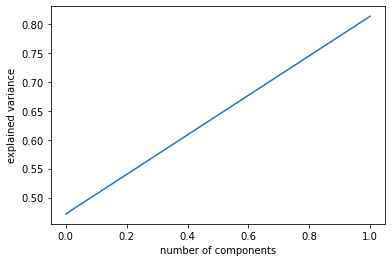

In [16]:
plt.plot(np.cumsum(pca_2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance')

Text(0, 0.5, 'PC2')

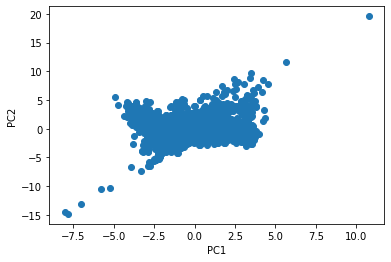

In [17]:
plt.scatter(x_pca_2[:,0],x_pca_2[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')

In [18]:
#Performing the PCA using the PCA model function from sklearn ; https://medium.com/data-science-365/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0
pca_95 = PCA(n_components=0.95) #pca with x dimensions so that we describe 95% of the variance to see how well pca captures the variance of the data
pca_95.fit(x)
x_pca_95 = pca_95.transform(x)

In [19]:
print('95% of the variance explained by # principal components=',x_pca_95.shape[1]) # this should be 100% because we include all variables

95% of the variance explained by # principal components= 3


In [20]:
columns = ['p_mean','ep_mean','t_mean','si_p']
df_sel = df[columns].dropna() # select columns for PCA

x = StandardScaler().fit_transform(df_sel) #standardize the values in columns to mean=0
x = pd.DataFrame(x, columns=columns)

x

,p_mean,ep_mean,t_mean,si_p
0,0.752903,-0.094068,-0.600713,-0.434227
1,0.857766,1.132628,1.509826,1.557881
2,-1.333660,-1.100571,-1.071514,0.634418
3,0.068660,1.082946,1.416857,-0.089368
4,1.056098,1.134187,1.402927,1.566060
...,...,...,...,...
8641,0.122784,-0.378281,-1.175598,-0.634422
8642,0.282745,0.864856,0.658444,-0.749959
8643,-0.565530,-1.340792,-0.379206,-0.912599
8644,0.846373,1.510101,1.612009,1.613366


In [21]:
pca = PCA(n_components=2)
components = pca.fit_transform(x)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create dataframe
pca_df = pd.DataFrame(data=components[:,0:2],columns=['PC1', 'PC2'])

In [22]:
loadings

array([[ 0.61238799,  0.7113541 ],
       [ 0.94981173,  0.05162552],
       [ 0.92947668, -0.06339818],
       [ 0.65055611, -0.65441258]])

In [145]:
df.columns

Index(['p_mean', 'ep_mean', 'q_mean', 't_mean', 'ai', 'hai', 'tdiff_max',
       'tdiff_mean', 'idu_mean', 'idu_max', 'hpd_mean', 'hpd_max', 'hpf',
       'lpf', 'si_p', 'si_ep', 'phi', 'de', 'dp', 'dt', 'sp', 'st', 'se', 'sd',
       'sti', 'ftf', 'idu_mean_l', 'idu_max_l', 'hpd_mean_l', 'hpd_max_l',
       'hpf_l', 'lpf_l', 'si_pl', 'phi_l', 'de_l', 'dp_l', 'dt_l', 'sp_l',
       'st_l', 'se_l', 'sd_l', 'sti_l', 'tc', 'ntc', 'nonveg', 'area',
       'ir_mean', 'el_mean', 'el_min', 'el_max', 'el_std', 'drd', 'slp_mean',
       'slp_max', 'slp_min', 'slp_std', 'cla', 'snd', 'slt', 'tpi', 'lat',
       'lon'],
      dtype='object')

In [149]:
df = pd.read_csv(f,index_col=0)
df = df.dropna()
features = ['p_mean','si_p','ep_mean','ai','t_mean','slp_mean','el_mean','tdiff_max','idu_mean','slp_mean','tdiff_max','cla','hai','tpi','sp','st','se','sd','phi_l','hpd_mean_l','lpf'] # the order of these variables seems to matter, but why?
X = df[features]
X = StandardScaler().fit_transform(X) #standardize all values
X = pd.DataFrame(X,columns=features)

pca = PCA(n_components=21)
components = pca.fit_transform(X)

loadings = pca.components_ #eigenvector, length represents variance var explains
 
# Create dataframe
pca_df = pd.DataFrame(data=components[:,0:2],columns=['PC1', 'PC2'])

In [150]:
X

,p_mean,si_p,ep_mean,ai,t_mean,slp_mean,el_mean,tdiff_max,idu_mean,slp_mean,...,cla,hai,tpi,sp,st,se,sd,phi_l,hpd_mean_l,lpf
0,0.736840,-0.433725,-0.169145,0.910133,-0.718836,1.381140,0.541225,0.255217,-0.641032,1.381140,...,-0.860964,-0.743563,-1.815498,-0.170590,-0.530102,-0.487141,0.452906,-1.243831,-0.528894,-0.955441
1,0.843955,1.522679,1.126973,-0.063385,1.513429,-0.419800,0.070383,-1.418179,0.709453,-0.419800,...,1.733954,0.188965,0.953979,0.992829,1.608859,-0.522992,-0.086434,-0.167761,-0.189816,-0.996646
2,-1.394531,0.615768,-1.232607,-0.948952,-1.216790,-0.869558,-0.103326,2.000970,0.138337,-0.869558,...,0.215405,0.242177,1.411587,0.962560,-0.541250,-0.567440,1.604592,-0.705796,0.284892,1.326860
3,0.037903,-0.095047,1.074480,-0.686667,1.415097,-0.033918,-0.690324,-1.377127,-0.133023,-0.033918,...,0.402140,0.617942,-0.868911,0.651058,1.715489,1.854178,-0.516481,-0.167761,1.302125,0.194485
4,1.046546,1.530712,1.128620,0.098127,1.400364,-0.380717,0.323290,-1.392032,0.712608,-0.380717,...,1.248613,0.056029,0.065575,0.937446,1.940486,1.863303,-0.407815,-0.167761,-0.528894,-1.001224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7891,0.093189,-0.630331,-0.469442,0.479637,-1.326877,-0.125828,-0.522607,1.647809,-0.678896,-0.125828,...,-1.287884,-0.738182,-0.745130,-0.118955,-0.403746,-0.430595,0.403808,-1.243831,-0.257632,-0.409856
7892,0.256586,-0.743798,0.844048,-0.388693,0.612943,-0.763233,-0.926756,0.213666,-0.259236,-0.763233,...,0.009908,0.022184,1.623898,1.322076,-0.518408,-0.558860,-2.028893,-1.243831,-0.596710,0.244083
7893,-0.609905,-0.903523,-1.486423,0.900477,-0.484553,-0.462348,-0.982770,-0.351375,-0.483265,-0.462348,...,0.351010,-0.240410,0.965662,0.199329,-0.445697,-0.601541,0.758381,1.446344,-1.003603,-0.287767
7894,0.832317,1.577170,1.525809,-0.287826,1.621505,-0.439972,-0.301763,-1.548422,1.384695,-0.439972,...,0.660736,0.242984,0.887156,0.996048,1.185923,1.891225,0.255449,-0.167761,0.963047,-0.936364


In [152]:
pca_df_scaled = pca_df.copy()
 
scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min()) # WAAROM DIT?
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

per_var  = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
per_var

array([27. , 18.6, 14.8,  7.4,  5.8,  4.7,  3.6,  3.3,  2.9,  2.7,  2.1,
        1.7,  1.6,  1.3,  0.9,  0.8,  0.4,  0.2,  0.1,  0. ,  0. ])

Text(0, 0.5, 'PC2 18.6%')

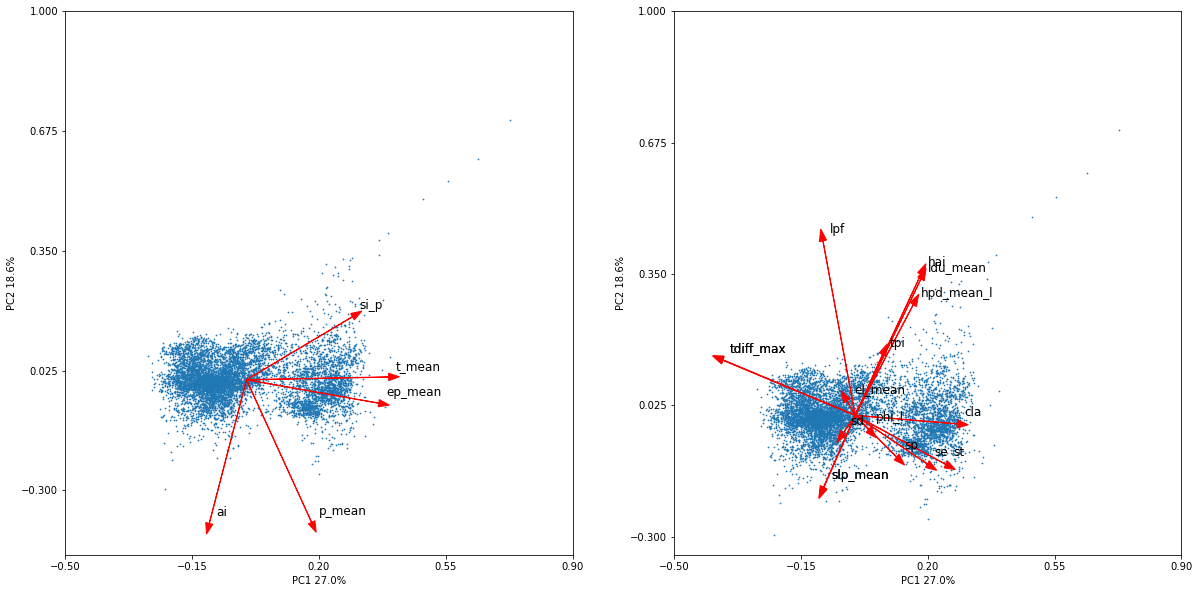

In [153]:
xs = loadings[0]
ys = loadings[1]

fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5)
# ax.scatter(pca_df.PC1,pca_df.PC2,s=0.5)

for i, varnames in enumerate(features[0:5]):
    ax.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(xs[i]+0.02, ys[i]+0.02, varnames,size=12)
    
xticks = np.linspace(-0.5,0.9, num=5)
yticks = np.linspace(-0.3,1, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlabel(f'PC1 {per_var[0]}%')
ax.set_ylabel(f'PC2 {per_var[1]}%')

ax = fig.add_subplot(122)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5)
# ax.scatter(pca_df.PC1,pca_df.PC2,s=0.5)

for i, varnames in enumerate(features[5:]):
    ax.arrow(
        0, 0, # coordinates of arrow base
        xs[i+5], # length of the arrow along x
        ys[i+5], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(xs[i+5]+0.02, ys[i+5]+0.02, varnames,size=12)
    
xticks = np.linspace(-0.5,0.9, num=5)
yticks = np.linspace(-0.3,1, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlabel(f'PC1 {per_var[0]}%')
ax.set_ylabel(f'PC2 {per_var[1]}%')

In [ ]:
#Identify the number of clusters
kmeans = KMeans(6)
kmeans.fit(x_pca)

#Identify the clusters
identified_clusters = kmeans.fit_predict(x_pca)
labels = kmeans.labels_

data_with_clusters = x_pca.copy()
data_with_clusters['Clusters'] = identified_clusters